In [1]:
import numpy as np
import xarray as xr

from os.path import expanduser,join,isdir
import sys
user_home_dir = expanduser('~')
ecco_v4_py_dir = join(user_home_dir,'ECCOv4-py')
if isdir(ecco_v4_py_dir):
    sys.path.insert(0,ecco_v4_py_dir)
import ecco_v4_py as ecco
import ecco_v4_py.ecco_access as ea

import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
access_mode = 's3_open_fsspec'
ECCO_dir = join('/efs_ecco','ECCO_V4r4_PODAAC')

# for access_mode = 's3_open_fsspec', need to specify the root directory 
# containing the jsons
jsons_root_dir = join('/efs_ecco','mzz-jsons')

ShortNames_list = ["ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4"]

# retrieve files
StartDate = '2010-01'
EndDate = '2010-12'
ds = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                 StartDate=StartDate,EndDate=EndDate,\
                                 mode=access_mode,\
                                 download_root_dir=ECCO_dir,\
                                 max_avail_frac=0.5,\
                                 jsons_root_dir=jsons_root_dir)

TypeError: Unsupported type for store_like: 'FSMap'

In [3]:
ds.Z.values
# type(ds)
ds

<xarray.Dataset> Size: 510MB
Dimensions:    (time: 12, k: 50, tile: 13, j: 90, i: 90, nb: 4, j_g: 90,
                i_g: 90, nv: 2, k_l: 50, k_p1: 51, k_u: 50)
Coordinates: (12/22)
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2010-01-16T12:00:00 ... 2010-12-16T1...
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            f07693e6-4181-11eb-beb3-0cc47a3f44ff

In [4]:
print(ds.XC.values[0,0,0])
print(ds.XG.values[0,0,0])
print(ds.XC_bnds.values[0,0,0,:])


-111.60647
-115.0
[-115.       -115.       -107.915245 -108.47213 ]


In [5]:
print(ds.i.long_name)
print(ds.j.long_name)
print(ds.k.long_name)

grid index in x for variables at tracer and 'v' locations
grid index in y for variables at tracer and 'u' locations
grid index in z for tracer variables


# Coordinates and Dimensions

array(-5., dtype=float32)

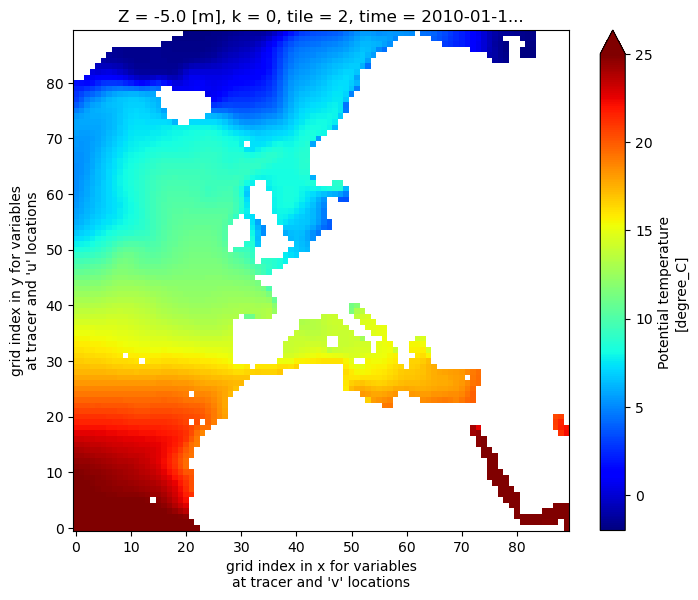

In [68]:
theta_dataset = ds
# 
fig=plt.figure(figsize=(8, 6.5))
theta_dataset.THETA.isel(k=0,tile=2,time=0).plot(vmin=-2, vmax=25, cmap='jet') # tile = 10
theta_dataset.Z[0].values

In [48]:
theta_dataset.attrs = []
theta_dataset

<xarray.Dataset> Size: 510MB
Dimensions:    (time: 12, k: 50, tile: 13, j: 90, i: 90, nb: 4, j_g: 90,
                i_g: 90, nv: 2, k_l: 50, k_p1: 51, k_u: 50)
Coordinates: (12/22)
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2010-01-16T12:00:00 ... 2010-12-16T1...
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>

In [59]:
theta_dataset.time_bnds[0,0:].values

<xarray.DataArray 'time_bnds' (time: 12, nv: 2)> Size: 192B
dask.array<getitem, shape=(12, 2), dtype=datetime64[ns], chunksize=(12, 2), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 96B 2010-01-16T12:00:00 ... 2010-12-16T1...
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Attributes:
    comment:                Start and end times of averaging period.
    coverage_content_type:  coordinate
    long_name:              time bounds of averaging period

## All ECCOv4 coordinates

In [69]:
## download file containing grid parameters and load into workspace

ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"]
grid_dataset = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                           StartDate=StartDate,EndDate=EndDate,\
                                           mode=access_mode,\
                                           download_root_dir=ECCO_dir,\
                                           max_avail_frac=0.5,\
                                           jsons_root_dir=jsons_root_dir).compute()

In [72]:
grid_dataset

# print("Why is rAs with j_g,i? Shouldn't it be j,i_g? ")

<xarray.Dataset> Size: 89MB
Dimensions:  (tile: 13, j: 90, i: 90, k: 50, k_p1: 51, nb: 4, j_g: 90, i_g: 90,
              nv: 2, k_l: 50, k_u: 50)
Coordinates: (12/20)
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    XG       (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    YG       (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...       ...
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PHrefC   (k) float32 200B 49.05 147.1 245.2 ... 5.357e+04 5.794e+04
    PHrefF   (k_p1) float32 204B 0.0 98.1 196.2 ... 5.145e+04 5.57e+04 6.018e+04
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    drC      (k_p1) float32 204B 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    ...       ...
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    rAs      (tile, j_g, i) float32 421kB 1.802e+08 1.807e+08 ... 3.605e+08
    rAw      (tile, j, i_g) float32 421kB 3.617e+08 3.628e+08 ... 3.648e+08
    rAz      (tile, j_g, i_g) float32 421kB 1.799e+08 1.805e+08 ... 3.642e+08
Attributes: (12/58)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

## Dimensions and Coordinates of Velocities

In [73]:
## download file containing monthly mean ocean velocities for March 2010, and load into workspace

ShortNames_list = ["ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4"]
vel_dataset = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                          StartDate='2010-03',EndDate='2010-03',\
                                          mode=access_mode,\
                                          download_root_dir=ECCO_dir,\
                                          max_avail_frac=0.5,\
                                          jsons_root_dir=jsons_root_dir).compute()

In [74]:
vel_dataset

<xarray.Dataset> Size: 68MB
Dimensions:    (time: 1, k: 50, tile: 13, j: 90, i_g: 90, j_g: 90, i: 90,
                k_l: 50, nb: 4, nv: 2, k_p1: 51, k_u: 50)
Coordinates: (12/22)
    XC         (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds    (tile, j, i, nb) float32 2MB -115.0 -115.0 ... -115.0 -108.5
    XG         (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC         (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds    (tile, j, i, nb) float32 2MB -88.18 -88.32 ... -88.18 -88.16
    YG         (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...         ...
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 8B 2010-03-16T12:00:00
    time_bnds  (time, nv) datetime64[ns] 16B 2010-03-01 2010-04-01
Dimensions without coordinates: nb, nv
Data variables:
    UVEL       (time, k, tile, j, i_g) float32 21MB nan nan nan ... nan nan nan
    VVEL       (time, k, tile, j_g, i) float32 21MB nan nan nan ... nan nan nan
    WVEL       (time, k_l, tile, j, i) float32 21MB nan nan nan ... nan nan nan
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Velocity - Monthly Mean llc90...
    uuid:                            26908be4-4182-11eb-98ea-0cc47a3f492b

In [87]:
# vel_dataset.WVEL[0,22,2,12,12].values
vel_dataset.UVEL.dims
vel_dataset.UVEL.coords

Coordinates:
    Z        (k) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 8B 2010-03-16T12:00:00

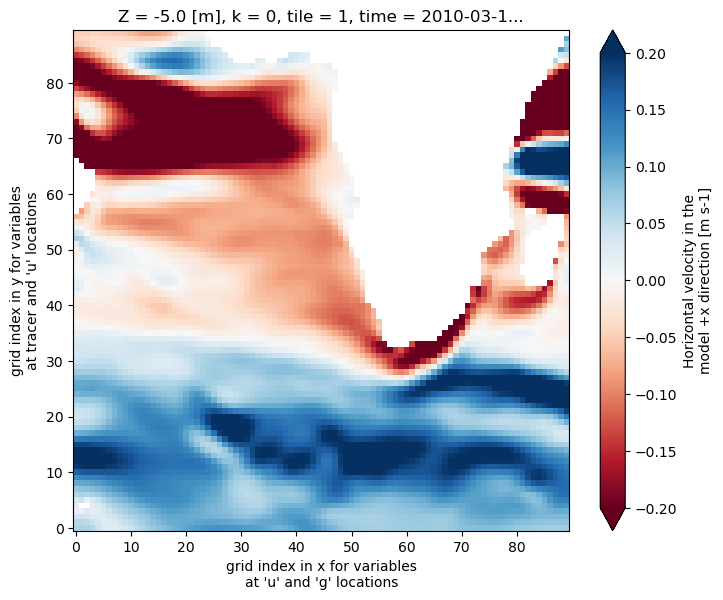

In [94]:
fig=plt.figure(figsize=(8, 6.5))
ud_masked = vel_dataset.UVEL.where(grid_dataset.hFacW > 0, np.nan)
ud_masked.isel(k=0,tile=1,time=0).plot(cmap='RdBu', vmin=-.2,vmax=.2)

In [99]:
grid_dataset

<xarray.Dataset> Size: 89MB
Dimensions:  (tile: 13, j: 90, i: 90, k: 50, k_p1: 51, nb: 4, j_g: 90, i_g: 90,
              nv: 2, k_l: 50, k_u: 50)
Coordinates: (12/20)
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    XG       (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    YG       (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...       ...
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PHrefC   (k) float32 200B 49.05 147.1 245.2 ... 5.357e+04 5.794e+04
    PHrefF   (k_p1) float32 204B 0.0 98.1 196.2 ... 5.145e+04 5.57e+04 6.018e+04
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    drC      (k_p1) float32 204B 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    ...       ...
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    rAs      (tile, j_g, i) float32 421kB 1.802e+08 1.807e+08 ... 3.605e+08
    rAw      (tile, j, i_g) float32 421kB 3.617e+08 3.628e+08 ... 3.648e+08
    rAz      (tile, j_g, i_g) float32 421kB 1.799e+08 1.805e+08 ... 3.642e+08
Attributes: (12/58)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

In [97]:
vel_dataset.WVEL.dims

('time', 'k_l', 'tile', 'j', 'i')

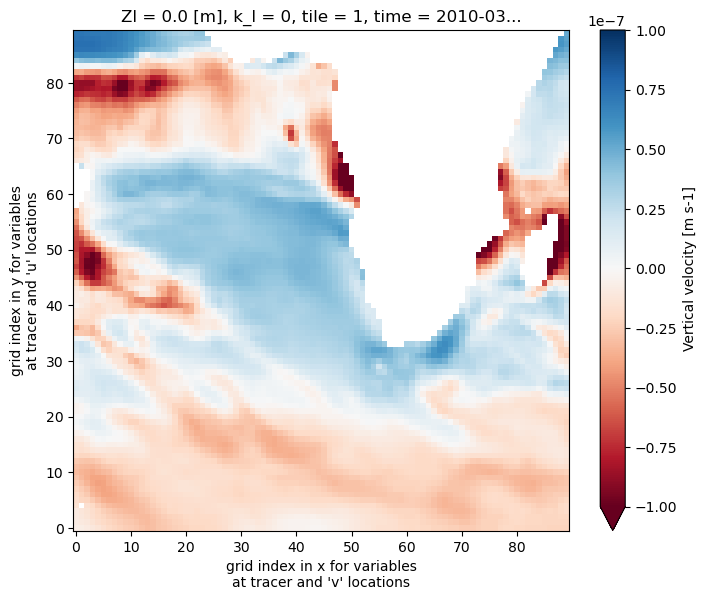

In [101]:
fig=plt.figure(figsize=(8, 6.5))
# use .values attribute below to avoid xarray getting confused about the different vertical dimensions (k_l vs. k)
wd_masked = vel_dataset.WVEL.where(grid_dataset.hFacC.values > 0, np.nan)
wd_masked.isel(k_l=0,tile=1,time=0).plot(cmap='RdBu', vmin=-1.e-7,vmax=1.e-7)